# Import Libraries

In [2]:
    # Load Data Set
import numpy as np
    # Read Data Set
import pandas as pd
    # Display Data Set
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
    # Split the Data Set
from sklearn.model_selection import train_test_split
    # Scale the Data Set
from sklearn.preprocessing import StandardScaler
    # Import Neural Network Model
from sklearn.neural_network import MLPClassifier
    # Import support vector machine Model
from sklearn.svm import SVC 
    # Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
    # Import LogisticRegression  Model
from sklearn.linear_model import LogisticRegression
    # For computing the accuracy of model predictions
from sklearn.metrics import accuracy_score
    # Import library for Results 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    # Import library for Save Results 
    import joblib
    %matplotlib inline

# Load the dataset
    We load the dataset using **Pandas** 

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Dataset/pima-indians-diabetes.data.csv")
print("Data Set Successfully loaded")

Data Set Successfully loaded


# Exploratory Data Analysis


Once the data is loaded, it is important to explore it and get a sense of its structure and content. we can use the head and tail functions to view the first and last few rows of the data, and the describe function to compute some basic statistics about the data. we can also use the info and dtypes functions to get more information about the data types of the columns.

In [6]:
# Get the column names of the DataFrame
columns = df.columns

# Explain the values of the columns
for i, col in enumerate(columns):
    print(f"Index {i}: Column name: {col}")


Index 0: Column name: preg
Index 1: Column name:  plas
Index 2: Column name: pres
Index 3: Column name: Skin 
Index 4: Column name: test
Index 5: Column name: mass
Index 6: Column name: pedi
Index 7: Column name: age
Index 8: Column name: class


**From above results and also from the offical data description we can notice following things.**

The dataset has the following features (columns):


    (preg)  Number of times pregnant 
    (plas)  Plasma glucose concentration at 2 h in an oral glucose tolerance test
    (pres)  Diastolic blood pressure 
    (skin)  Triceps skin fold thickness 
    (test)  2-h serum insulin 
    (mass)  Body mass index 
    (pedi)  Diabetes pedigree function It indicates the function which scores likelihood of diabetes based on family history
    (age)   Age 
    (class) Whether patient is diagnosed with Diabetes (0 for No, 1 for Yes)
    
Here, the class is our target variable. We clearly see that apart from the property **class** all other properties are numerical and continuous in nature.

In [8]:
print("The First 8 rows of Data:")
df.head(8)

The First 8 rows of Data:


,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [9]:
print("The Last 7 rows of Data:")
df.tail(7)

The Last 7 rows of Data:


,preg,plas,pres,Skin,test,mass,pedi,age,class
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
print("Data information:\n")
df.info()

Data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1    plas   768 non-null    int64  
 2   pres    768 non-null    int64  
 3   Skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
print("Unique Values:")
df.nunique()

Unique Values:


preg      17
 plas    136
pres      47
Skin      51
test     186
mass     248
pedi     517
age       52
class      2
dtype: int64

In [12]:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [13]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


preg     0
 plas    0
pres     0
Skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

# Data Visualization
In this section, we will start visualizing the features of the dataset one by one.

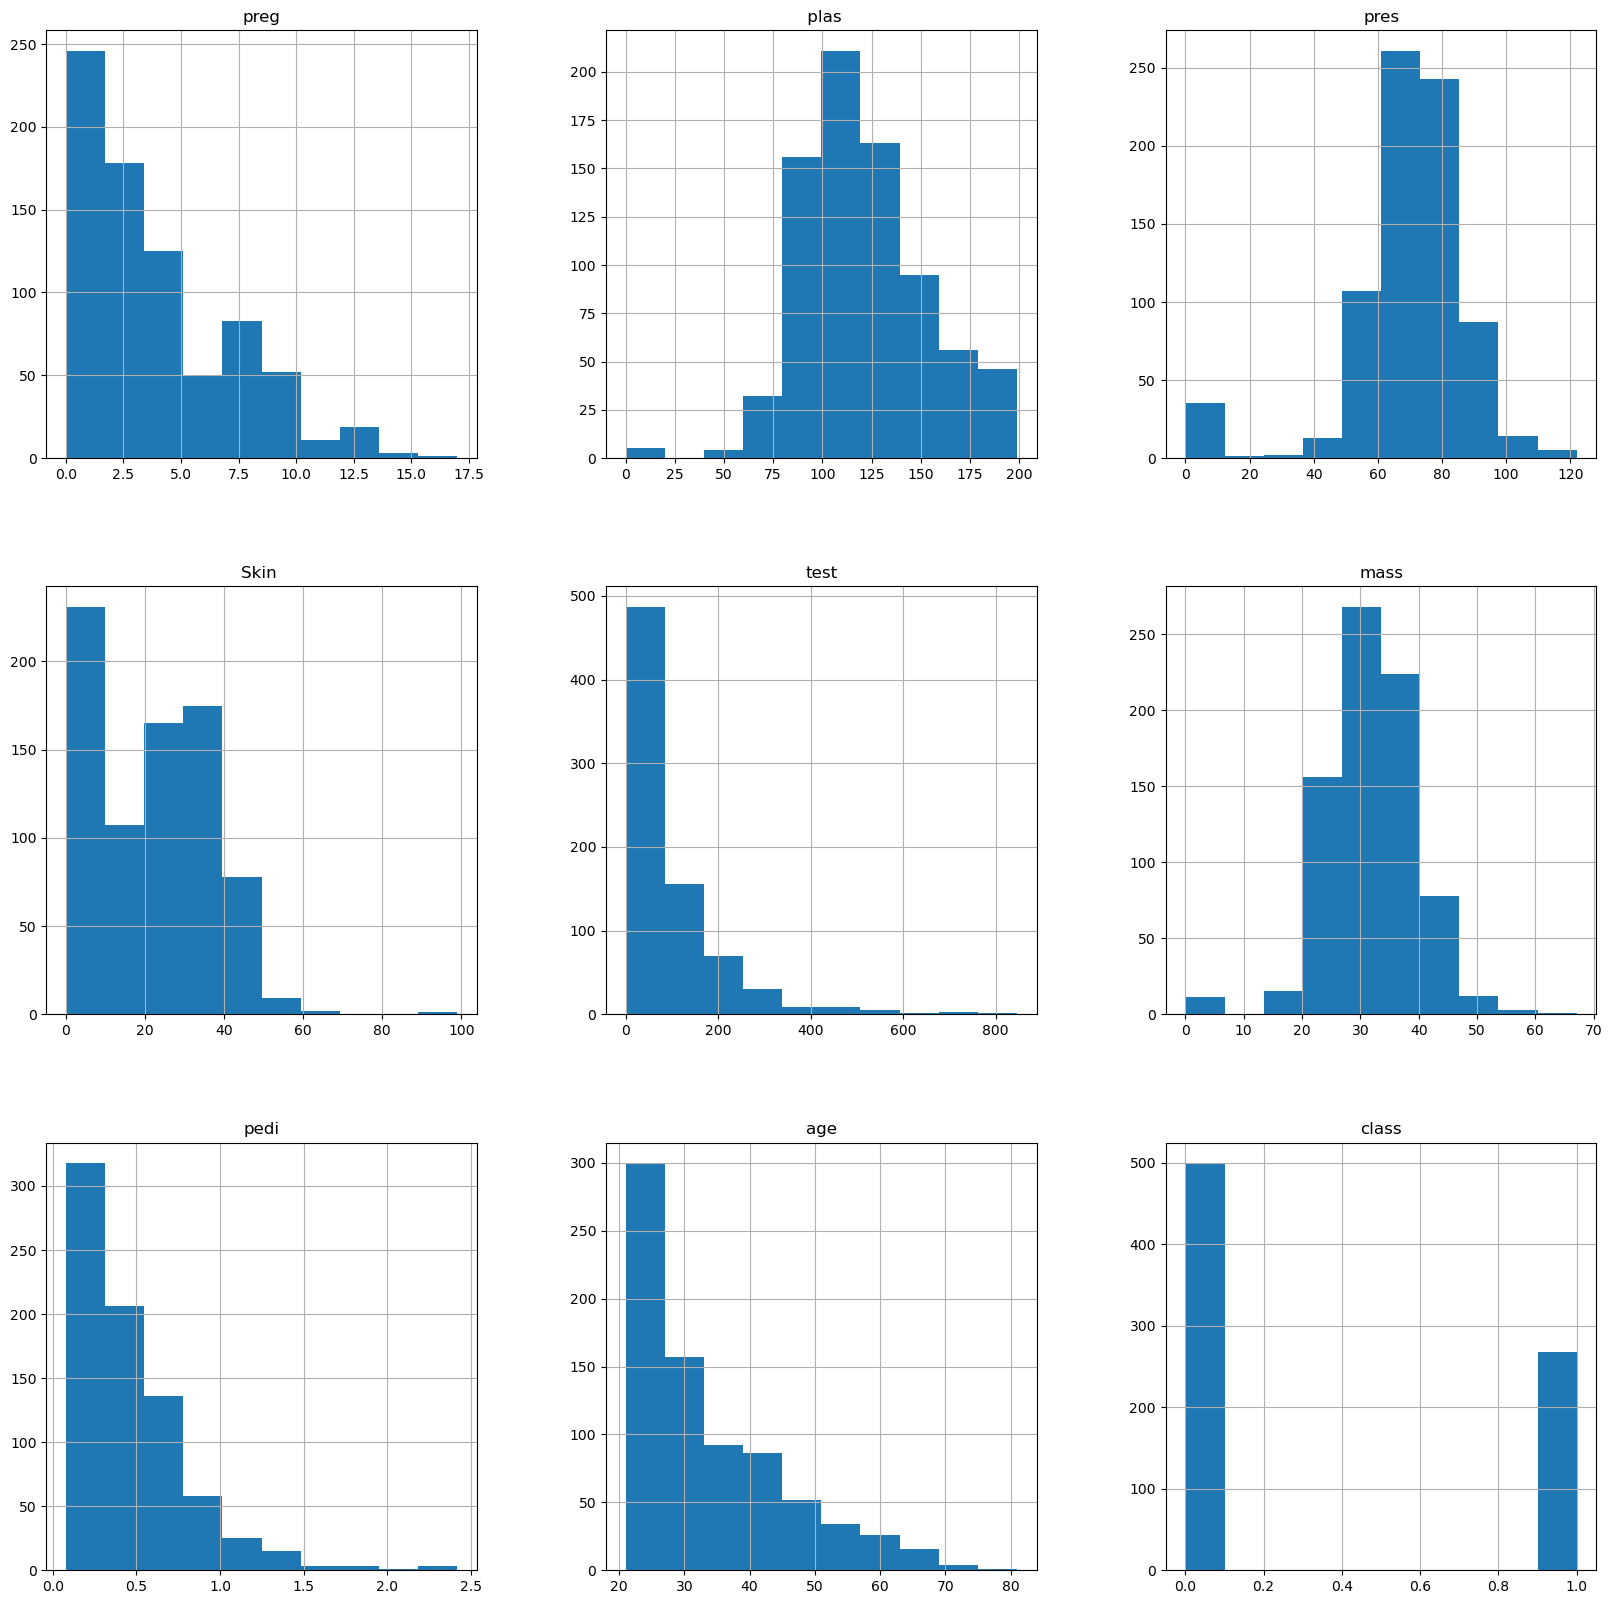

In [15]:
# Create histograms for all columns in the DataFrame
df.hist(figsize=(20, 20))

# Show the histograms
plt.show()

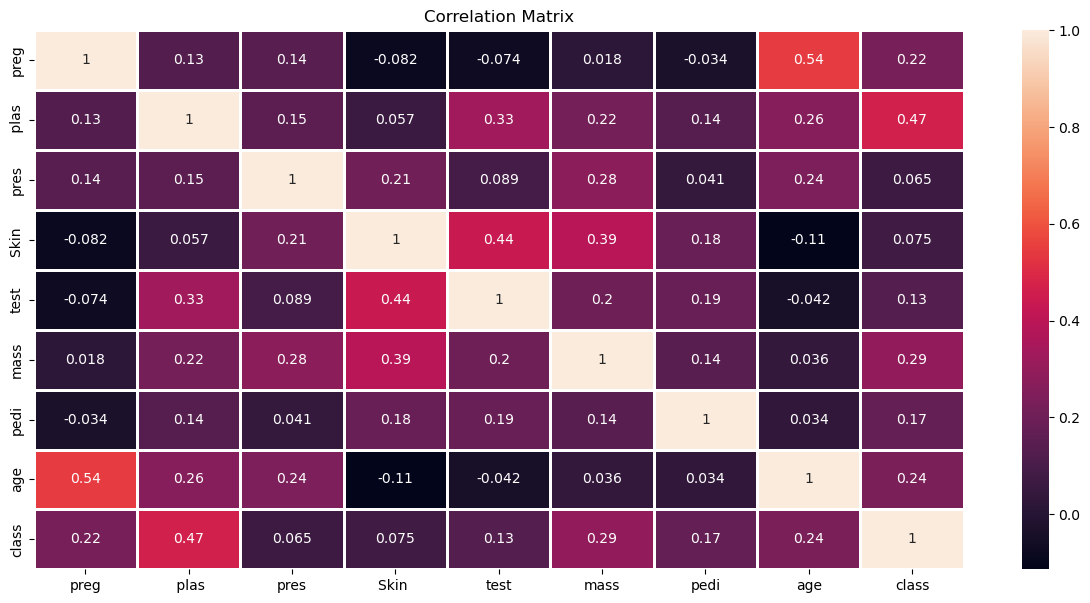

In [16]:
# Calculate the correlation matrix before removing null values
corr_matrix = df.corr()

# Set the size of the figure
fig20, ax20 = plt.subplots(figsize=(15, 7))

# Create the heatmap
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20, linewidths=0.9)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [17]:
corr_class_before = corr_matrix["class"].sort_values(ascending=False)
print(corr_class_before)

class    1.000000
 plas    0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
test     0.130548
Skin     0.074752
pres     0.065068
Name: class, dtype: float64


# Preprocess the data:
The next step is to clean the data by handling missing values and ensuring that the data is in a consistent format. we can use the isnull and notnull functions to identify missing values, and the replace function to fill in missing values with a placeholder value. we can also use the apply function to apply a custom function to each element in the DataFrame.

In [19]:
# Generate descriptive statistics for the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Things to Observe**

The features "plas," "pres," "Skin," "test," and "mass" all have a minimum value of 0. 
This is illogical because these values can't be zero. Therefore, in our circumstance, this can be safely referred to as "missing data".
The 0-valued rows must either be removed or replaced with the mean or median value for that feature. 

In [21]:
# Check for missing values in the DataFrame
print("Rows with plas value of 0: ", df[df[" plas"] == 0].shape[0])
print("Rows with pres value of 0: ", df[df["pres"] == 0].shape[0])
print("Rows with Skin value of 0: ", df[df["Skin "] == 0].shape[0])
print("Rows with test value of 0: ", df[df["test"] == 0].shape[0])
print("Rows with mass value of 0: ", df[df["mass"] == 0].shape[0])

Rows with plas value of 0:  5
Rows with pres value of 0:  35
Rows with Skin value of 0:  227
Rows with test value of 0:  374
Rows with mass value of 0:  11


In [22]:
# first copy the original dataframe into a new pandas dataframe
df_cp = df.copy()

# now fill the missing values with the median value of the particular columns
df_cp[' plas'] = df[' plas'].replace(0, df[' plas'].median())
df_cp['pres'] = df['pres'].replace(0, df['pres'].median())
df_cp['Skin '] = df['Skin '].replace(0, df['Skin '].median())
df_cp['test'] = df['test'].replace(0, df['test'].median())
df_cp['mass'] = df['mass'].replace(0, df['mass'].median())

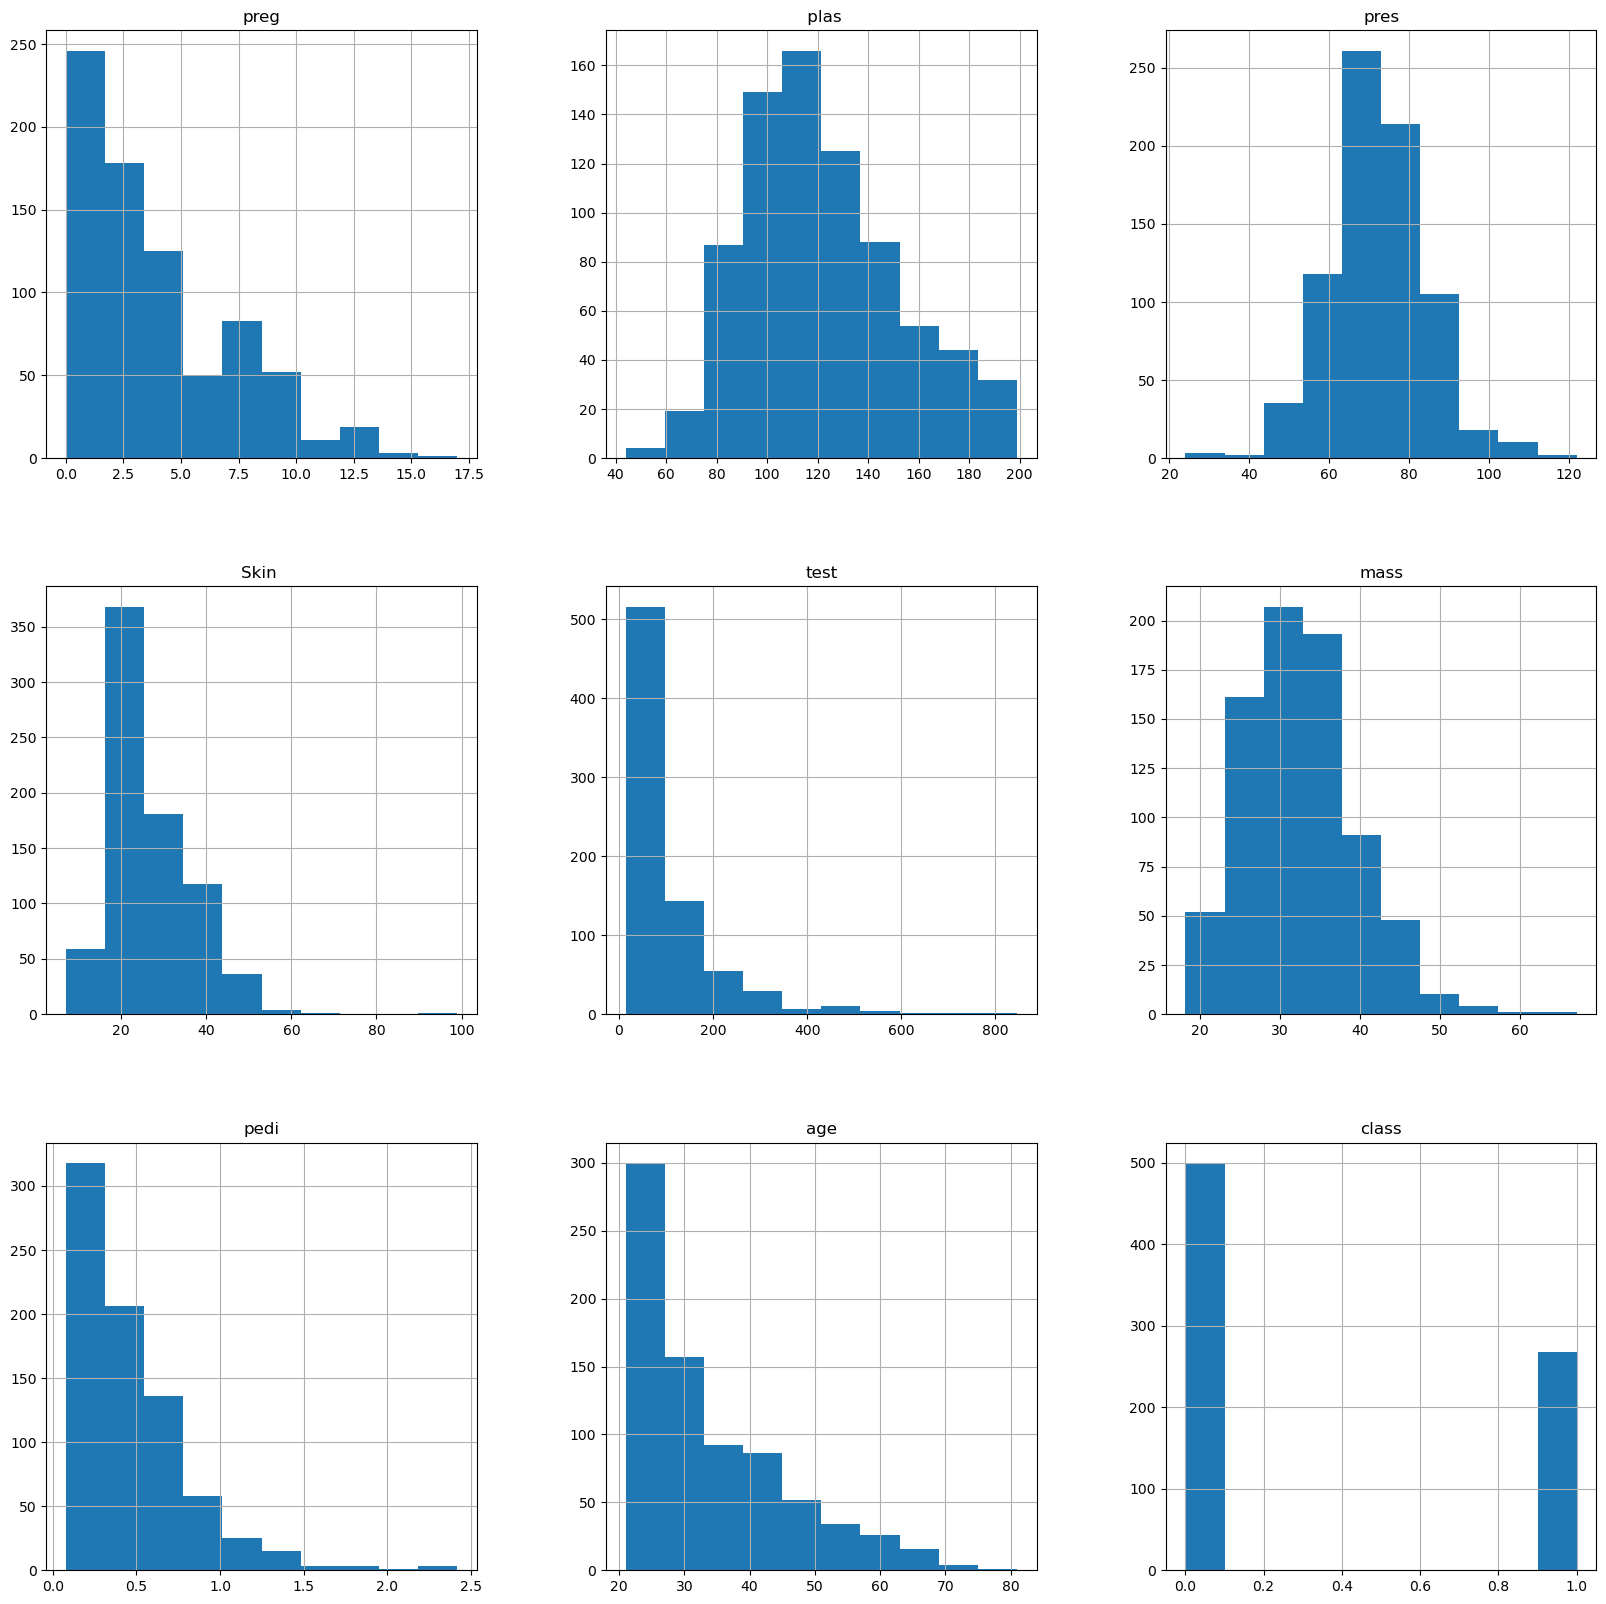

In [23]:
# Create histograms for all columns in the DataFrame
df_cp.hist(figsize=(20, 20))

# Show the histograms
plt.show()

In [24]:
# Generate descriptive statistics for the DataFrame after removing null values.
df_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
Skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


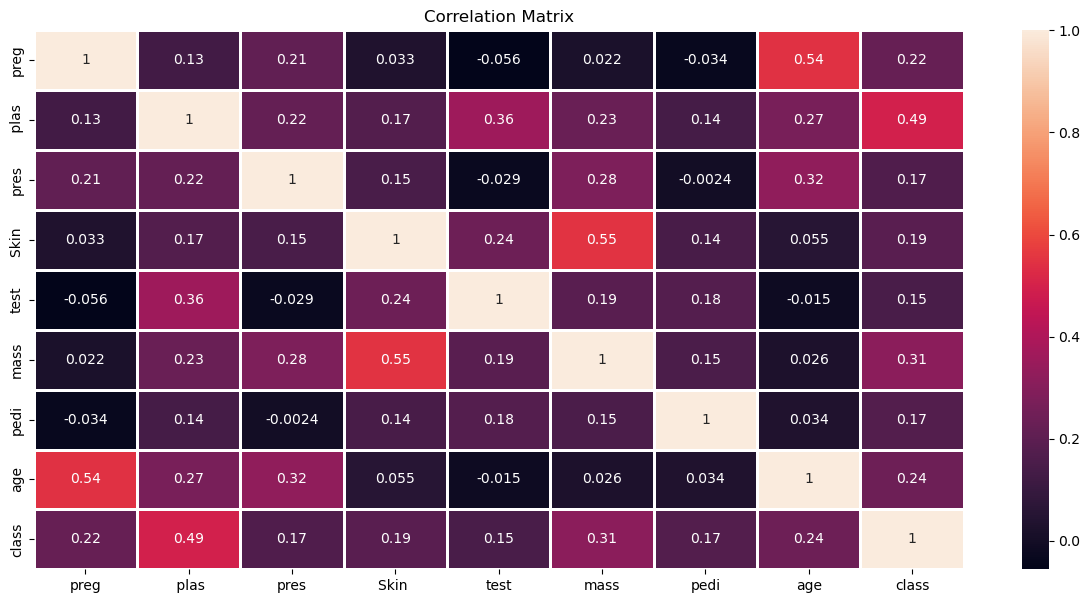

In [25]:
# Calculate the correlation matrix after removing null values
corr_matrix = df_cp.corr()

# Set the size of the figure
fig20, ax20 = plt.subplots(figsize=(15, 7))

# Create the heatmap
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20, linewidths=0.9)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [26]:
corr_class_after = corr_matrix["class"].sort_values(ascending=False)
print(corr_class_after)

class    1.000000
 plas    0.492782
mass     0.312249
age      0.238356
preg     0.221898
Skin     0.189065
pedi     0.173844
pres     0.165723
test     0.148457
Name: class, dtype: float64


Correlation matrix shows that there are mild correlations between **Skin-mass** and **Age-Preg**. 
**class** has the highest linear correlation with **plas**.

# Split the data:
Now we build a machine learning model, we need to split the data into a training set and a test set. we can use the train_test_split function from the sklearn.model_selection module to split the data into these two sets.

In [29]:
df_cp_X = df_cp.drop('class', axis=1)
df_cp_Y = df_cp["class"]

# Display information about data_X
print("data_X info:\n")
df_cp_X.info()

# Display information about data_Y
print("\ndata_Y info:\n")
df_cp_Y.info()

data_X info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1    plas   768 non-null    int64  
 2   pres    768 non-null    int64  
 3   Skin    768 non-null    int64  
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 48.1 KB

data_Y info:

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: class
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


# Scale the data:
Many machine learning algorithms require that the input features are scaled to a uniform range. we can use the StandardScaler class from the sklearn.preprocessing module to scale the features to a standard normal distribution.

In [31]:
# Split the dataset into train and test sets
train_X, test_X, train_Y, test_Y = train_test_split(df_cp_X, df_cp_Y,test_size=0.3, stratify=df_cp_Y, random_state=0)

# Reset the indices of the DataFrames
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

In [32]:
# Normalize the value counts to get percentages
train_Y.value_counts(normalize= True)*100

class
0    65.176909
1    34.823091
Name: proportion, dtype: float64

In [33]:
# Normalize the value counts to get percentages
test_Y.value_counts(normalize= True)*100

class
0    64.935065
1    35.064935
Name: proportion, dtype: float64

In [34]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
train_X_scaled = scaler.fit_transform(train_X)

# Transform the test data using the same scaler
test_X_scaled = scaler.transform(test_X)

# Apply Models:
In our Projet, we can use the four different Machine learning models.

Neural Network Model
---

In [36]:
# Initializing the MLPClassifier with 2 hidden layers of sizes 100 and 50 respectively,
# maximum iteration set to 1000, and random_state for reproducibility set to 42
model_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Training the neural network model using the scaled training data (train_X_scaled) and corresponding training labels (train_Y)
model_nn.fit(train_X_scaled, train_Y)

# Making predictions on the scaled training data and test data using the trained neural network model
train_pred_nn = model_nn.predict(train_X_scaled)
test_pred_nn = model_nn.predict(test_X_scaled)

# Calculating training accuracy
train_accuracy_nn = accuracy_score(train_Y, train_pred_nn)
print("Training Accuracy of the neural network model:", train_accuracy_nn)

# Calculating testing accuracy
test_accuracy_nn = accuracy_score(test_Y, test_pred_nn)
print("Testing Accuracy of the neural network model:", test_accuracy_nn)


Training Accuracy of the neural network model: 1.0
Testing Accuracy of the neural network model: 0.70995670995671


Support Vector Machine Model
---

In [38]:
# Initializing the SVC with linear kernel
model_svm = SVC(kernel='linear')

# Training the SVM model using the scaled training data (train_X_scaled) and corresponding training labels (train_Y)
model_svm.fit(train_X_scaled, train_Y)

# Making predictions on the scaled training data using the trained SVM model
train_pred_svm = model_svm.predict(train_X_scaled)

# Making predictions on the scaled test data (X_test_scaled) using the trained SVM model
test_pred_svm = model_svm.predict(test_X_scaled)

# Calculating training accuracy
train_accuracy_svm = accuracy_score(train_Y, train_pred_svm)
print("Training Accuracy of the SVM model:", train_accuracy_svm)

# Calculating testing accuracy
test_accuracy_svm = accuracy_score(test_Y, test_pred_svm)
print("Testing Accuracy of the SVM model:", test_accuracy_svm)


Training Accuracy of the SVM model: 0.7802607076350093
Testing Accuracy of the SVM model: 0.7619047619047619


Decision Tree Model
---

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initializing the DecisionTreeClassifier with random_state for reproducibility
model_dt = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model using the scaled training data (train_X_scaled) and corresponding training labels (train_Y)
model_dt.fit(train_X_scaled, train_Y)

# Making predictions on the scaled training data for consistency
train_pred_dt = model_dt.predict(train_X_scaled)

# Making predictions on the scaled test data (test_X_scaled) using the trained Decision Tree model
test_pred_dt = model_dt.predict(test_X_scaled)

# Calculating training accuracy
train_accuracy_dt = accuracy_score(train_Y, train_pred_dt)
print("Training Accuracy of the Decision Tree model:", train_accuracy_dt)

# Calculating testing accuracy
test_accuracy_dt = accuracy_score(test_Y, test_pred_dt)
print("Testing Accuracy of the Decision Tree model:", test_accuracy_dt)


Training Accuracy of the Decision Tree model: 1.0
Testing Accuracy of the Decision Tree model: 0.6926406926406926


# LR Model

In [42]:
# Initializing the LogisticRegression model
model_lr = LogisticRegression()

# Training the Logistic Regression model using the scaled training data (train_X_scaled_lr) and corresponding training labels (train_Y)
model_lr.fit(train_X_scaled, train_Y)

# Making predictions on the scaled training data for consistency
train_pred_lr = model_lr.predict(train_X_scaled)

# Making predictions on the scaled test data (test_X_scaled) using the trained Logistic Regression model
test_pred_lr = model_lr.predict(test_X_scaled)

# Calculating training accuracy
train_accuracy_lr = accuracy_score(train_Y, train_pred_lr)
print("Training Accuracy of the Logistic Regression model:", train_accuracy_lr)

# Calculating testing accuracy
test_accuracy_lr = accuracy_score(test_Y, test_pred_lr)
print("Testing Accuracy of the Logistic Regression model:", test_accuracy_lr)



Training Accuracy of the Logistic Regression model: 0.7802607076350093
Testing Accuracy of the Logistic Regression model: 0.7619047619047619


# Show Results

Now we show the results, in which we generate a confusion matrix to assess the Accuracy, Precision, Recall, F1 score in the trained model.

In [44]:
# Get the Final Results

# Define model names
model_names = ["Neural Network", "Support Vector Machine", "Decision Tree", "Logistic Regression"]
y_preds = [test_pred_nn, test_pred_svm, test_pred_dt, test_pred_lr]

# Print confusion matrices
for model_name, y_pred in zip(model_names, y_preds):
    cm = confusion_matrix(test_Y, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted Yes', 'Predicted No'], index=['Actual Yes', 'Actual No'])
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm_df)

# Create a DataFrame for evaluation metrics
metrics = []
for model_name, y_pred in zip(model_names, y_preds):
    accuracy = accuracy_score(test_Y, y_pred)
    precision = precision_score(test_Y, y_pred)
    recall = recall_score(test_Y, y_pred)
    f1 = f1_score(test_Y, y_pred)
    metrics.append([model_name, accuracy, precision, recall, f1])

metrics_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
metrics_df.index += 1

# Display the evaluation metrics table
metrics_df



Confusion Matrix for Neural Network:
            Predicted Yes  Predicted No
Actual Yes            114            36
Actual No              31            50

Confusion Matrix for Support Vector Machine:
            Predicted Yes  Predicted No
Actual Yes            131            19
Actual No              36            45

Confusion Matrix for Decision Tree:
            Predicted Yes  Predicted No
Actual Yes            117            33
Actual No              38            43

Confusion Matrix for Logistic Regression:
            Predicted Yes  Predicted No
Actual Yes            132            18
Actual No              37            44


,Model,Accuracy,Precision,Recall,F1 Score
1,Neural Network,0.709957,0.581395,0.617284,0.598802
2,Support Vector Machine,0.761905,0.703125,0.555556,0.620690
3,Decision Tree,0.692641,0.565789,0.530864,0.547771
4,Logistic Regression,0.761905,0.709677,0.543210,0.615385


# Best	Accuracy Model
Now, we show the best model give the high accuracy for prediction.

In [46]:
# Sort the metrics DataFrame by Accuracy in descending order
sorted_metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Get the model with the highest accuracy
best_model = sorted_metrics_df.iloc[0]['Model']
best_accuracy = sorted_metrics_df.iloc[0]['Accuracy']

print(f"The model with the highest accuracy is")
print(f"{best_model} with an accuracy of {best_accuracy:.2f}.")


The model with the highest accuracy is
Support Vector Machine with an accuracy of 0.76.


# Comparison Between the Models
This comparison evaluates the accuracy of four models: Neural Network, Support Vector Machine, Decision Tree, and Logistic Regression. The bar graph highlights each model's performance, allowing for a quick assessment of their effectiveness.

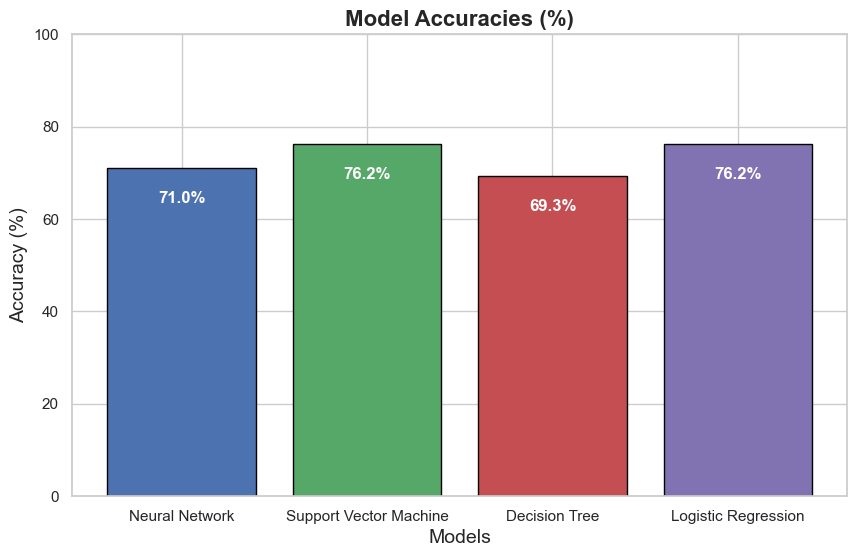

In [48]:
# Define model names and accuracies
model_names = ["Neural Network", "Support Vector Machine", "Decision Tree", "Logistic Regression"]
accuracies = [test_accuracy_nn * 100, test_accuracy_svm * 100, test_accuracy_dt * 100, test_accuracy_lr * 100]

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot with enhanced styling
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'], edgecolor="black")

# Labeling the bars with accuracy values
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text on the bar
        bar.get_height() - 5,               # Position slightly below top of bar
        f"{bar.get_height():.1f}%",         # Format as a percentage
        ha='center', va='top', color='white', fontsize=12, fontweight='bold'
    )

# Customize plot appearance
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Model Accuracies (%)", fontsize=16, fontweight='bold')
plt.ylim(0, 100)  # Set y-axis from 0 to 100 for percentage scale

plt.show()

# Save The Model
Now, we Save the model for future use.

In [50]:
# Save the best model to a file
joblib.dump(best_model, 'Best_Diabetes_Prediction_model.pkl')

print(f"{best_model} saved successfully for future use.")

Support Vector Machine saved successfully for future use.
